# Problem Statement 1 [5 Marks]


Your task in this assignment is to:



Perform appropriate Exploratory Data Analysis (EDA) and preprocessing on the wine dataset [1 mark]
Apply DBSCAN clustering to the data and identify any outliers [2 marks]
After finding the best clustering solution and removing outliers, interpret some or all of the clusters and derive domain-specific insights from the results [2 marks]


Data: wine-clustering.csv



Clustering starter ideas:

- Experiment with different values of min_pts and eps in DBSCAN

- Try various feature scaling techniques before applying DBSCAN

- Visualize clusters and outliers using appropriate plots

## Task 1:- Perform appropriate Exploratory Data Analysis (EDA) and preprocessing on the wine dataset [1 mark]

### Import the data and read it into a data frame

In [246]:
# Importing required packages
import numpy as np
import pandas as pd
import warnings as war
war.filterwarnings("ignore")

### Get the dimensions of the dataframe.

In [247]:
# Defining dataset csv Path
dataSetPath="C:\\Users\ASUS\\jupyterworkspace\\Assignment & Mini Project\Module_04_Unsupervised Learning and Association Rule Mining\Assignment_02\\wine-clustering.csv"
# Loading dataSet
dataSetRead=pd.read_csv(dataSetPath)

In [248]:
# Displaying dimension of dataSet
print("Dimention of Dataset:- {}".format(dataSetRead.shape[0:2]))
print("Total number of rows in Dataset:- {}".format(dataSetRead.shape[0]))
print("Total number of columns in Dataset:- {}".format(dataSetRead.shape[1]))

Dimention of Dataset:- (178, 13)
Total number of rows in Dataset:- 178
Total number of columns in Dataset:- 13


### Confirm the data has been correctly by displaying the first 5, last 5  and all records.

In [249]:
# Displaying first 5 records to confirming data loading
print("*****************************************************Displaying below first 5 records**********************************************************")
dataSetRead.head()

*****************************************************Displaying below first 5 records**********************************************************


Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [250]:
# Displaying last 5 records to confirming data loading
print("*****************************************************Displaying below last 5 records**********************************************************")
dataSetRead.tail()

*****************************************************Displaying below last 5 records**********************************************************


Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     OD280  Proline  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560

In [251]:
# Displaying all records to confirming data loading
print("*****************************************************Displaying below all records**********************************************************")
dataSetRead

*****************************************************Displaying below all records**********************************************************


Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

### Display the columns and their respective data types.

In [252]:
# Displaying the columns and their respective data types
dataSetRead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


### Display the description and statistical summary of the data.

In [253]:
# Displaying description & statistcal summary of the dataSet
dataSetRead.describe().T

count        mean         std     min       25%  \
Alcohol               178.0   13.000618    0.811827   11.03   12.3625   
Malic_Acid            178.0    2.336348    1.117146    0.74    1.6025   
Ash                   178.0    2.366517    0.274344    1.36    2.2100   
Ash_Alcanity          178.0   19.494944    3.339564   10.60   17.2000   
Magnesium             178.0   99.741573   14.282484   70.00   88.0000   
Total_Phenols         178.0    2.295112    0.625851    0.98    1.7425   
Flavanoids            178.0    2.029270    0.998859    0.34    1.2050   
Nonflavanoid_Phenols  178.0    0.361854    0.124453    0.13    0.2700   
Proanthocyanins       178.0    1.590899    0.572359    0.41    1.2500   
Color_Intensity       178.0    5.058090    2.318286    1.28    3.2200   
Hue                   178.0    0.957449    0.228572    0.48    0.7825   
OD280                 178.0    2.611685    0.709990    1.27    1.9375   
Proline               178.0  746.893258  314.907474  278.00  500.5000   

                          50%       75%      max  
Alcohol                13.050   13.6775    14.83  
Malic_Acid              1.865    3.0825     5.80  
Ash                     2.360    2.5575     3.23  
Ash_Alcanity           19.500   21.5000    30.00  
Magnesium              98.000  107.0000   162.00  
Total_Phenols           2.355    2.8000     3.88  
Flavanoids              2.135    2.8750     5.08  
Nonflavanoid_Phenols    0.340    0.4375     0.66  
Proanthocyanins         1.555    1.9500     3.58  
Color_Intensity         4.690    6.2000    13.00  
Hue                     0.965    1.1200     1.71  
OD280                   2.780    3.1700     4.00  
Proline               673.500  985.0000  1680.00

### Check for Data Quality Issues

* duplicate data
* missing data

In [254]:
# Checking for duplicate records
duplicateValue_Count=dataSetRead.duplicated().sum()
print("Total no of duplicate records count:- {}".format(duplicateValue_Count))

Total no of duplicate records count:- 0


In [255]:
# Checking total no. of missing values for attributes specific
missingValue_Count=dataSetRead.isnull().sum()
print(missingValue_Count)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


### Data Distribution

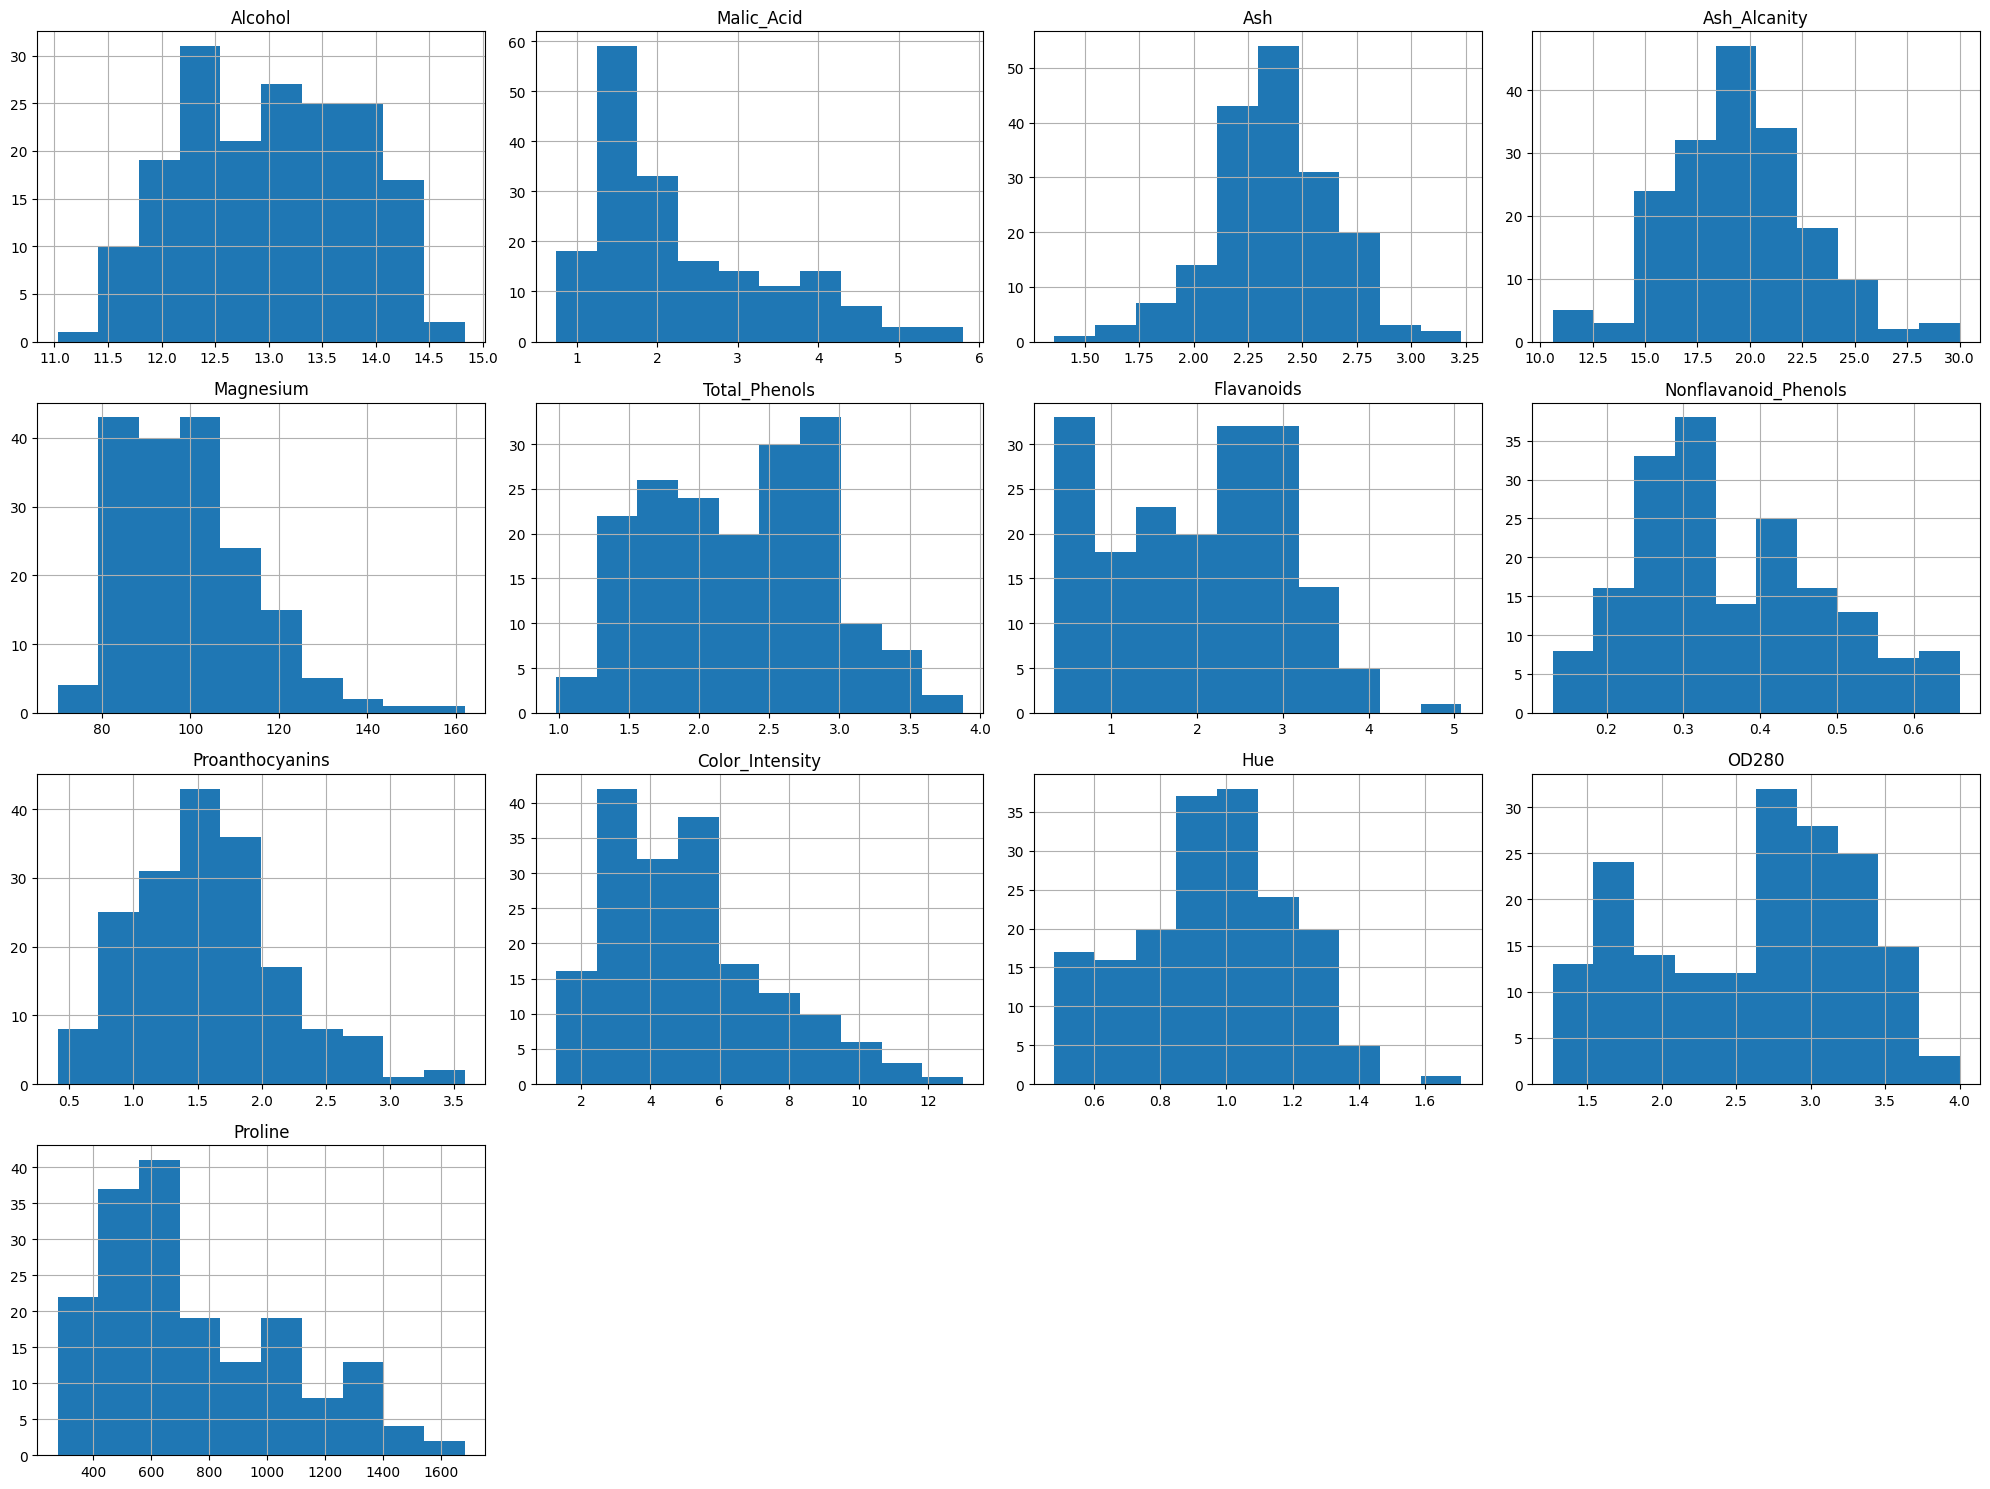

In [256]:
# Importing required package
import matplotlib.pyplot as plot
# Plotting histograms for each feature
dataSetRead.hist(bins=10, figsize=(20, 15), grid=True)
plot.tight_layout()
plot.show()

### To analyze the histograms and decide on preprocessing steps, let’s review the visual characteristics of each feature:

Alcohol: Distribution appears bimodal. No extreme skewness, but scaling may be helpful for standardization.

Malic_Acid: Right-skewed distribution, with most values concentrated on the left. Log or Box-Cox transformation could be useful.

Ash: Roughly symmetric distribution. Likely does not require transformation but could benefit from scaling.

Ash_Alcalinity: Slight right skew. Normalization might be helpful to address the spread of values.

Magnesium: Right-skewed. Potentially large range. A log transformation and scaling could be useful.

Total_Phenols: Slight right skew, moderate spread. Scaling is likely sufficient.

Flavanoids: Right skew. A log transformation might reduce the skew.

Nonflavanoid_Phenols: Concentrated toward lower values with some spread. Standardization should suffice.

Proanthocyanins: Slight right skew, though mostly compact. Scaling may suffice.

Color_Intensity: Strong right skew with outliers on the high end. Log transformation can help normalize the distribution.

Hue: Roughly symmetric and compact. Minimal preprocessing needed, but scaling may help.

OD280/OD315: Moderate right skew. Log transformation or scaling could be helpful.

Proline: Highly right-skewed, large range of values. Log transformation and scaling are strongly recommended.

In [257]:
# Preprocessing (scaling)
# Imporing required package
from sklearn.preprocessing import StandardScaler,MinMaxScaler
MinMax_scaler = MinMaxScaler()
data_scaled = MinMax_scaler.fit_transform(dataSetRead)

In [258]:
print(data_scaled)

[[0.84210526 0.1916996  0.57219251 ... 0.45528455 0.97069597 0.56134094]
 [0.57105263 0.2055336  0.4171123  ... 0.46341463 0.78021978 0.55064194]
 [0.56052632 0.3201581  0.70053476 ... 0.44715447 0.6959707  0.64693295]
 ...
 [0.58947368 0.69960474 0.48128342 ... 0.08943089 0.10622711 0.39728959]
 [0.56315789 0.36561265 0.54010695 ... 0.09756098 0.12820513 0.40085592]
 [0.81578947 0.66403162 0.73796791 ... 0.10569106 0.12087912 0.20114123]]


### Principal Component Analysis (PCA) for dimmensionality reduction

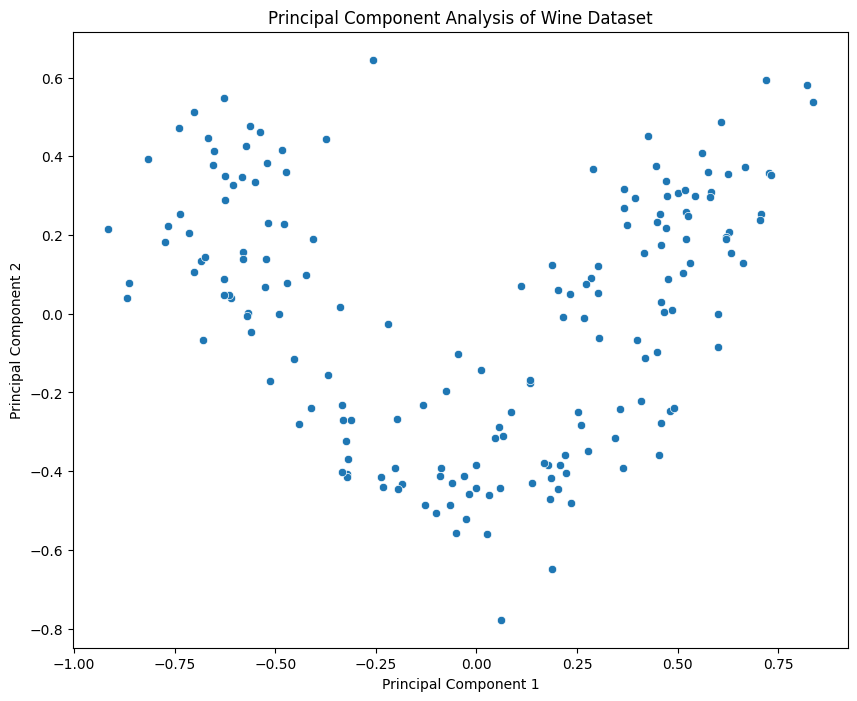

In [289]:
# Imporing required package
# Perform PCA
from sklearn.decomposition import PCA
# Perform PCA for dimensionality reduction (Reduce to 2 components for visualization)
pca_2d = PCA(n_components=2) # Keep all components to analyze explained variance
data_pca_2d = pca_2d.fit_transform(data_scaled)


# Create a DataFrame with the principal components
pca_dataSetRead = pd.DataFrame(data=data_pca_2d, columns=['PC_1', 'PC_2'])

# Add the principal components to the original DataFrame for visualization
dataSetRead['PC_1'] = pca_dataSetRead['PC_1']
dataSetRead['PC_2'] = pca_dataSetRead['PC_2']

# Visualize explained variance ratio
plot.figure(figsize=(10, 8))
sbn.scatterplot(data=dataSetRead, x='PC_1', y='PC_2')
plot.title('Principal Component Analysis of Wine Dataset')
plot.xlabel('Principal Component 1')
plot.ylabel('Principal Component 2')
plot.show()

In [260]:
# Get the explained variance ratio (percentage impact of each component)
explained_variance_ratio = pca.explained_variance_ratio_
# Get the component names (here we assume 'PC1', 'PC2', ... as component names)
components = [f"PC{i+1}" for i in range(len(explained_variance_ratio))]
# Combine component names with their explained variance ratio (% impact)
component_impact = pd.DataFrame({
'Component': components,
'Explained Variance (%)': explained_variance_ratio * 100
})
# Print the result
print(component_impact)

  Component  Explained Variance (%)
0       PC1               44.056988
1       PC2               23.104716


### Correlation Analysis

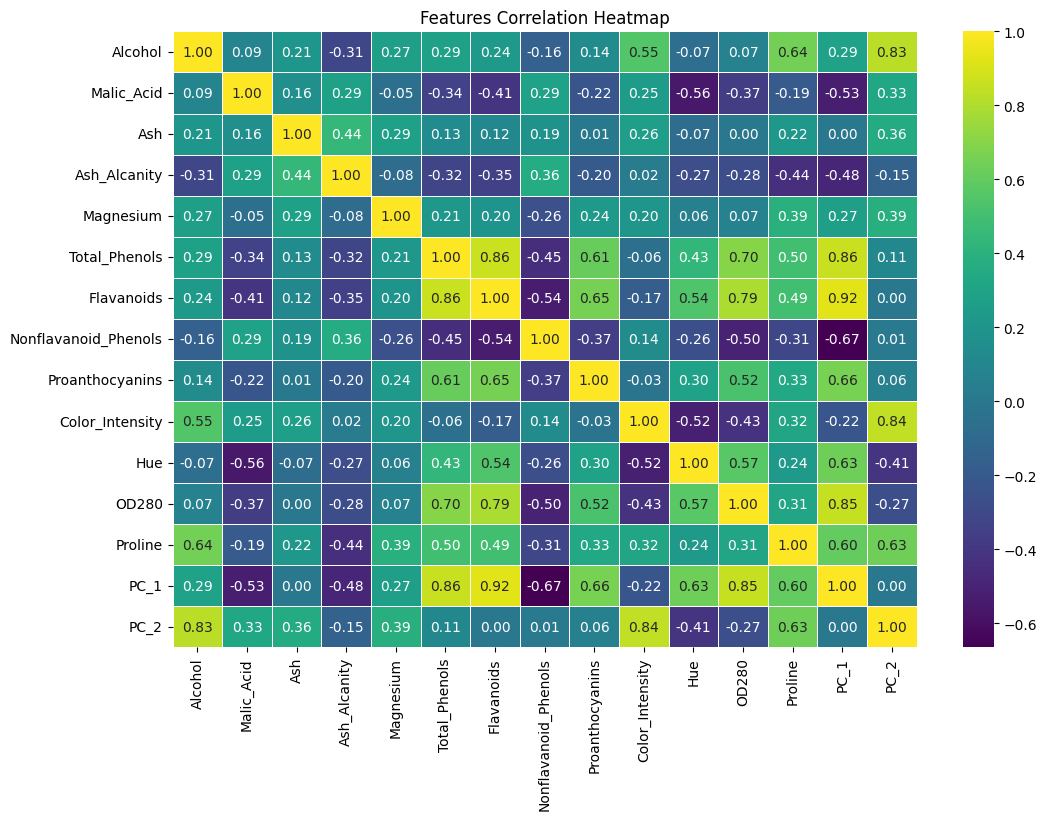

In [261]:
# Imporing required package
import seaborn as sbn
# Using Seaborn to create a heatmap
correlation_matrix = dataSetRead.corr()
plot.figure(figsize=(12, 8))
sbn.heatmap(correlation_matrix, annot=True, cmap='viridis',fmt='.2f', linewidths=0.5)
plot.title('Features Correlation Heatmap')
plot.show()

## Task 2:- Apply DBSCAN clustering to the data and identify any outliers [2 marks]

In [262]:
# Applying DBSCAN with eps = 0.15 and min_samples = 4
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) : Determine optimal eps with K-nearest neighbors (KNN) distance plot
# Imporing required package
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.15, min_samples=4)
# Add DBSCAN cluster labels to the dataset for analysis
dbscan_labels = dbscan.fit_predict(pca_dataSetRead)
# Add the cluster labels to the DataFrame
dataSetRead['Cluster'] = dbscan_labels
print(dataSetRead['Cluster'].value_counts())

Cluster
 0    172
-1      6
Name: count, dtype: int64


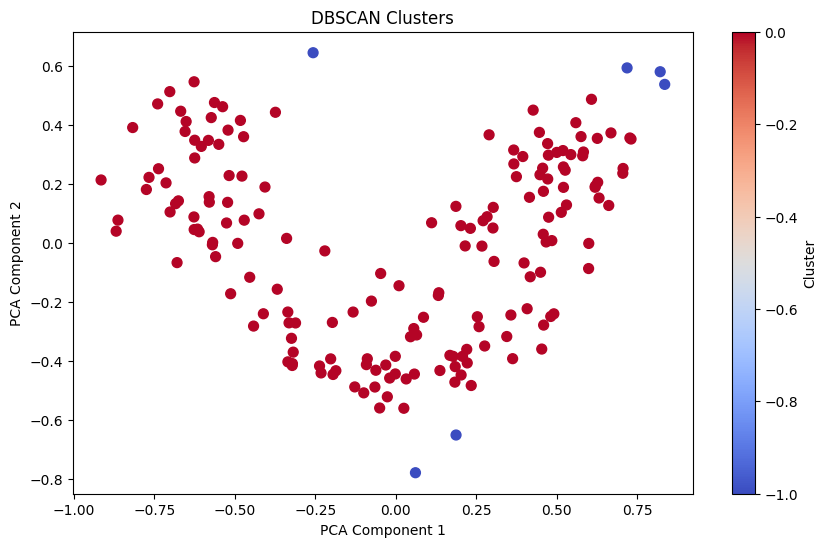

In [263]:
# Plotting DBSCAN Clustering
plot.figure(figsize=(10, 6))
plot.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=dbscan_labels, cmap="coolwarm", s=50, label="Clusters")
plot.colorbar(label="Cluster")
plot.title("DBSCAN Clusters")
plot.xlabel("PCA Component 1")
plot.ylabel("PCA Component 2")
plot.show()

In [264]:
# Applying DBSCAN with eps = 0.13 and min_samples = 10
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) : Determine optimal eps with K-nearest neighbors (KNN) distance plot
dbscan = DBSCAN(eps=0.13, min_samples=10)
# Add DBSCAN cluster labels to the dataset for analysis
dbscan_labels = dbscan.fit_predict(pca_dataSetRead)
# Add the cluster labels to the DataFrame
dataSetRead['Cluster'] = dbscan_labels
dataSetRead['Cluster'].value_counts()

Cluster
 2    49
 0    43
-1    34
 3    26
 4    17
 1     9
Name: count, dtype: int64

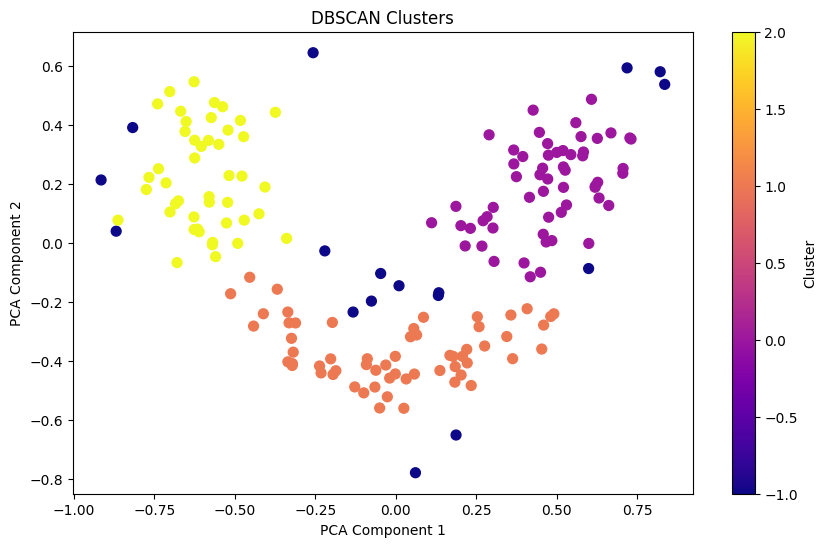

In [301]:
# Plotting DBSCAN Clustering
plot.figure(figsize=(10, 6))
plot.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=dbscan_labels, cmap="plasma", s=50, label="Clusters")
plot.colorbar(label="Cluster")
plot.title("DBSCAN Clusters")
plot.xlabel("PCA Component 1")
plot.ylabel("PCA Component 2")
plot.show()

In [266]:
# Applying DBSCAN with eps = 0.14 and min_samples = 8
# DBSCAN (Density-Based Spatial Clustering of Applications with Noise) : Determine optimal eps with K-nearest neighbors (KNN) distance plot
dbscan = DBSCAN(eps=0.14, min_samples=8)
# Add DBSCAN cluster labels to the dataset for analysis
dbscan_labels = dbscan.fit_predict(pca_dataSetRead)
# Add the cluster labels to the DataFrame
dataSetRead['Cluster'] = dbscan_labels
dataSetRead['Cluster'].value_counts()

Cluster
 1    59
 0    57
 2    45
-1    17
Name: count, dtype: int64

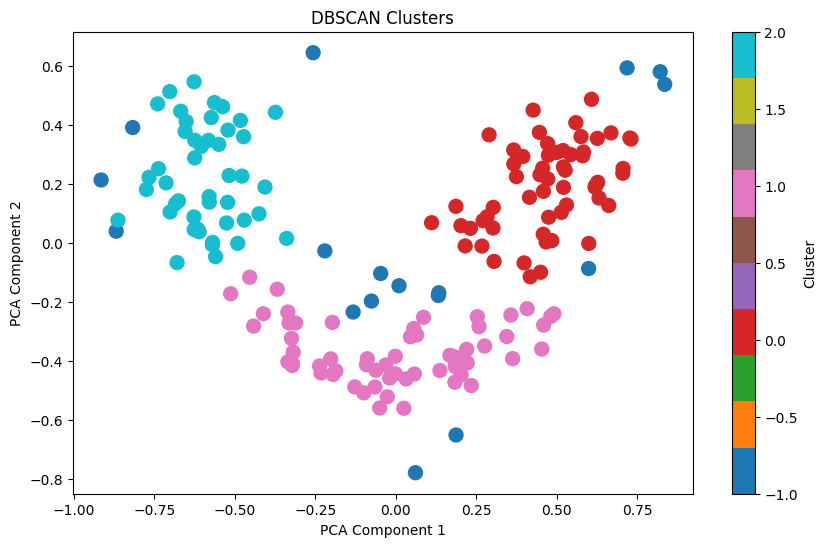

In [299]:
# Plotting DBSCAN Clustering
plot.figure(figsize=(10, 6))
plot.scatter(data_pca_2d[:, 0], data_pca_2d[:, 1], c=dbscan_labels, cmap="tab10", s=100, label="Clusters")
plot.colorbar(label="Cluster")
plot.title("DBSCAN Clusters")
plot.xlabel("PCA Component 1")
plot.ylabel("PCA Component 2")
plot.show()

## Task 3:- After finding the best clustering solution and removing outliers, interpret some or all of the clusters and derive domain-specific insights from the results [2 marks]

1- Cluster with eps=0.15, min samples=4 is looking best one as it has created 5 cluster with 31 outlters

2- Identifying Distinct Clusters: Ecamine the untque clusters and thetr stzes, as this can help reveal different groups within the wine dataset.

3- Analyzing Outlters: DBSCAN labels outlters as -1, representing data points that don't belong to any cluster. These outlters may include wines with     unusual chemtcal properties or characteristics compared to the majority.

4- Domatn-Specific Instghts: For instance, clusters with higher values for Total_Phenols and Flavanotds could point to wines with higher antioxident
   content, which is often preferred. Analyzing the mean and vartance of each feature within the clusters can provtde deeper insights.

5- Optional: Fine-tuning the eps Parameter: If the clustering results appear unsatisfactory-such as too many outlters or too few clusters-constder   
   slightly adjusting the eps parameter and re-running DBSCAN to see if the clustering improves.

6- Let me know if you need help interpreting any spectfic clusters or conducting additional analysts.

7- Interpretation of DBSCAN Clustering Results (Clusters and Outliers)

8- The plot you generated visualizes DBSCAN clustering results on the #wine_dataset, projected into two princtpal components. Here's a breakdown of    
   the clustering:

9- Clusters and Outlters: Yellow points represent the primary cluster #(labeled -0), while purple points (label -1) are outlters identifted by DBSCAN.    These outlters are scattered and don't fit well within the main clusters.

10- Outlters: These outlters could represent wines with distinct chemicaal composttions. Identifying these spectfic data points could provtde valuable     insights, such as wines with unusual phenol content or untque color intenstty.

Please find below the clusters interpretation based on the mean values provided and derive some domain-specific insights:

Cluster 0:

Alcohol: Highest average alcohol content, suggesting stronger-tasting wines.

Malic Acid: Moderate level, indicating a balanced acidity.

Total Phenols and Flavanoids: Highest values (2.80 and 2.93 respectively), suggesting robust flavor profiles with more tannins.

Color Intensity: Moderate, indicating a good depth of color.

Proline: Highest (1088.72), which is often associated with higher quality wines.

Insights:

Likely represents full-bodied, high-quality wines with strong flavors and good aging potential.

These wines might be more suitable for consumers who prefer robust and complex wines.

Cluster 1:

Alcohol: Lowest average alcohol content, indicating lighter wines.

Malic Acid: Lowest level (1.93), suggesting smoother wines with less tartness.

Total Phenols and Flavanoids: Moderate values (2.25 and 2.09 respectively), indicating balanced flavor profiles.

Color Intensity: Lowest (3.05), suggesting lighter-colored wines.

Proline: Lowest , indicating wines that might be intended for earlier consumption.

Insights:

Likely represents lighter, fresher wines that are easy to drink.

These wines might appeal to consumers who prefer smoother, less intense wines.

Cluster 2:

Alcohol: Moderate average alcohol content (13.13).

Malic Acid: Highest level (3.27), indicating more acidic wines.

Total Phenols and Flavanoids: Lowest values (1.67 and 0.81 respectively), suggesting less complex flavor profiles.

Color Intensity: Highest (7.34), indicating deeply colored wines.

Proline: Moderate (627.33), suggesting moderate quality.

Insights:

Likely represents wines with high acidity and deep color, possibly red wines with a sharp taste.

These wines might be more suitable for consumers who enjoy tart and visually striking wines.

Domain-Specific Insights:

Wine Type: Cluster 0 likely represents high-quality red wines, Cluster 1 could represent lighter red or white wines, and Cluster 2 might represent 

acidic red wines.

Acidity & Taste: Cluster 0 wines are balanced, Cluster 1 wines are smooth, and Cluster 2 wines are tart.

Aging Potential: Cluster 0 wines have the best aging potential, Cluster 1 wines are for early consumption, and Cluster 2 wines have moderate aging 
potential.

# Problem Statement 2 [5 Marks]

our task in this assignment is to:



Perform appropriate EDA and preprocessing on the credit card usage dataset [1 mark]
Apply multiple clustering algorithms as specified below [2 marks]
Compare the performance of different clustering algorithms using a clustering metric of your choice [1 mark]
After finding the best clustering solution, interpret some or all of the clusters and derive domain-specific insights from the results [1 mark]


Data: credit_card_usage.zip



Clustering algorithms to apply:

a) Agglomerative clustering
b) DBSCAN
c) K-Means (as an additional algorithm)



Clustering starter ideas:

- For Agglomerative clustering: Experiment with different linkage methods (Single, Complete, Average) and distance measures (Euclidean, Manhattan, Cosine)

- For DBSCAN: Try different min_pts and eps values

- For K-Means: Use the elbow method to determine the optimal number of clusters

- Visualize the clusters using appropriate dimensionality reduction techniques



## Task 1:- Perform appropriate EDA and preprocessing on the credit card usage dataset [1 mark]

### Import the data and read it into a data frame

In [268]:
# Defining dataset csv Path
dataSetPath1="C:\\Users\ASUS\\jupyterworkspace\\Assignment & Mini Project\Module_04_Unsupervised Learning and Association Rule Mining\Assignment_02\\CC GENERAL.csv"
# Loading dataSet
dataSetRead1=pd.read_csv(dataSetPath1)

### Get the dimensions of the dataframe.

In [269]:
# Displaying dimension of dataSet
print("Dimention of Dataset:- {}".format(dataSetRead1.shape[0:2]))
print("Total number of rows in Dataset:- {}".format(dataSetRead1.shape[0]))
print("Total number of columns in Dataset:- {}".format(dataSetRead1.shape[1]))

Dimention of Dataset:- (8950, 18)
Total number of rows in Dataset:- 8950
Total number of columns in Dataset:- 18


### Confirm the data has been correctly by displaying the first 5, last 5  and all records.

In [270]:
# Displaying first 5 records to confirming data loading
print("*****************************************************Displaying below first 5 records**********************************************************")
dataSetRead1.head()

*****************************************************Displaying below first 5 records**********************************************************


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [271]:
# Displaying last 5 records to confirming data loading
print("*****************************************************Displaying below last 5 records**********************************************************")
dataSetRead1.tail()

*****************************************************Displaying below last 5 records**********************************************************


CUST_ID     BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
8945  C19186   28.493517           1.000000     291.12              0.00   
8946  C19187   19.183215           1.000000     300.00              0.00   
8947  C19188   23.398673           0.833333     144.40              0.00   
8948  C19189   13.457564           0.833333       0.00              0.00   
8949  C19190  372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
8945  325.594462         48.886365              0.50       6  
8946  275.861322               NaN              0.00       6  
8947   81.270775         82.418369              0.25       6  
8948   52.549959         55.755628              0.25       6  
8949   63.165404         88.288956              0.00       6

In [272]:
# Displaying last all records to confirming data loading
print("*****************************************************Displaying below all records**********************************************************")
dataSetRead1

*****************************************************Displaying below all records**********************************************************


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

### Display the columns and their respective data types.

In [273]:
# Displaying the columns and their respective data types
dataSetRead1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Display the description and statistical summary of the data.

In [274]:
# Displaying description & statistcal summary of the dataSet
dataSetRead1.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8949.0  4494.449450  3638.815725  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8637.0   864.206542  2372.446607   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   169.123707   312.343947   825.485459   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

### Check for Data Quality Issues

* duplicate data
* missing data

In [275]:
# Checking for duplicate records
duplicateValue_Count1=dataSetRead1.duplicated().sum()
print("Total no of duplicate records count:- {}".format(duplicateValue_Count1))

Total no of duplicate records count:- 0


In [276]:
# Checking total no. of missing values for attributes specific
missingValue_Count1=dataSetRead1.isnull().sum()
print(missingValue_Count1)

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [277]:
#finding missing values attribues with counts
missingValue_attributes1=missingValue_Count1[missingValue_Count1.where(missingValue_Count1.values>0).notnull()]
print(missingValue_attributes1)
#Finding the attributes's key which have missing values
print("Below is the list of  missing values attributes:- ")
print(missingValue_attributes1.keys())

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64
Below is the list of  missing values attributes:- 
Index(['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'], dtype='object')


In [278]:
#Imputing missing value for CREDIT_LIMIT with the mode
mode_value_CREDIT_LIMIT = dataSetRead1['CREDIT_LIMIT'].mode()[0]
dataSetRead1['CREDIT_LIMIT'].fillna(mode_value_CREDIT_LIMIT, inplace=True)
#Imputing missing value for MINIMUM_PAYMENTS with mean
mean_value_MINIMUM_PAYMENTS = dataSetRead1['MINIMUM_PAYMENTS'].mean()
dataSetRead1['MINIMUM_PAYMENTS'].fillna(mean_value_MINIMUM_PAYMENTS, inplace=True)

In [279]:
# Checking for missing values post imputation
print(dataSetRead1.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [290]:
# Min-max scaling on the numeric data
#Use numeric data for min-max scaling
data = dataSetRead1.select_dtypes(include=['float64', 'int64']).copy()
MinMax_scaler1 = MinMaxScaler()
data_scaled1 = scaler.fit_transform(data)

### Visualize Data Distribution

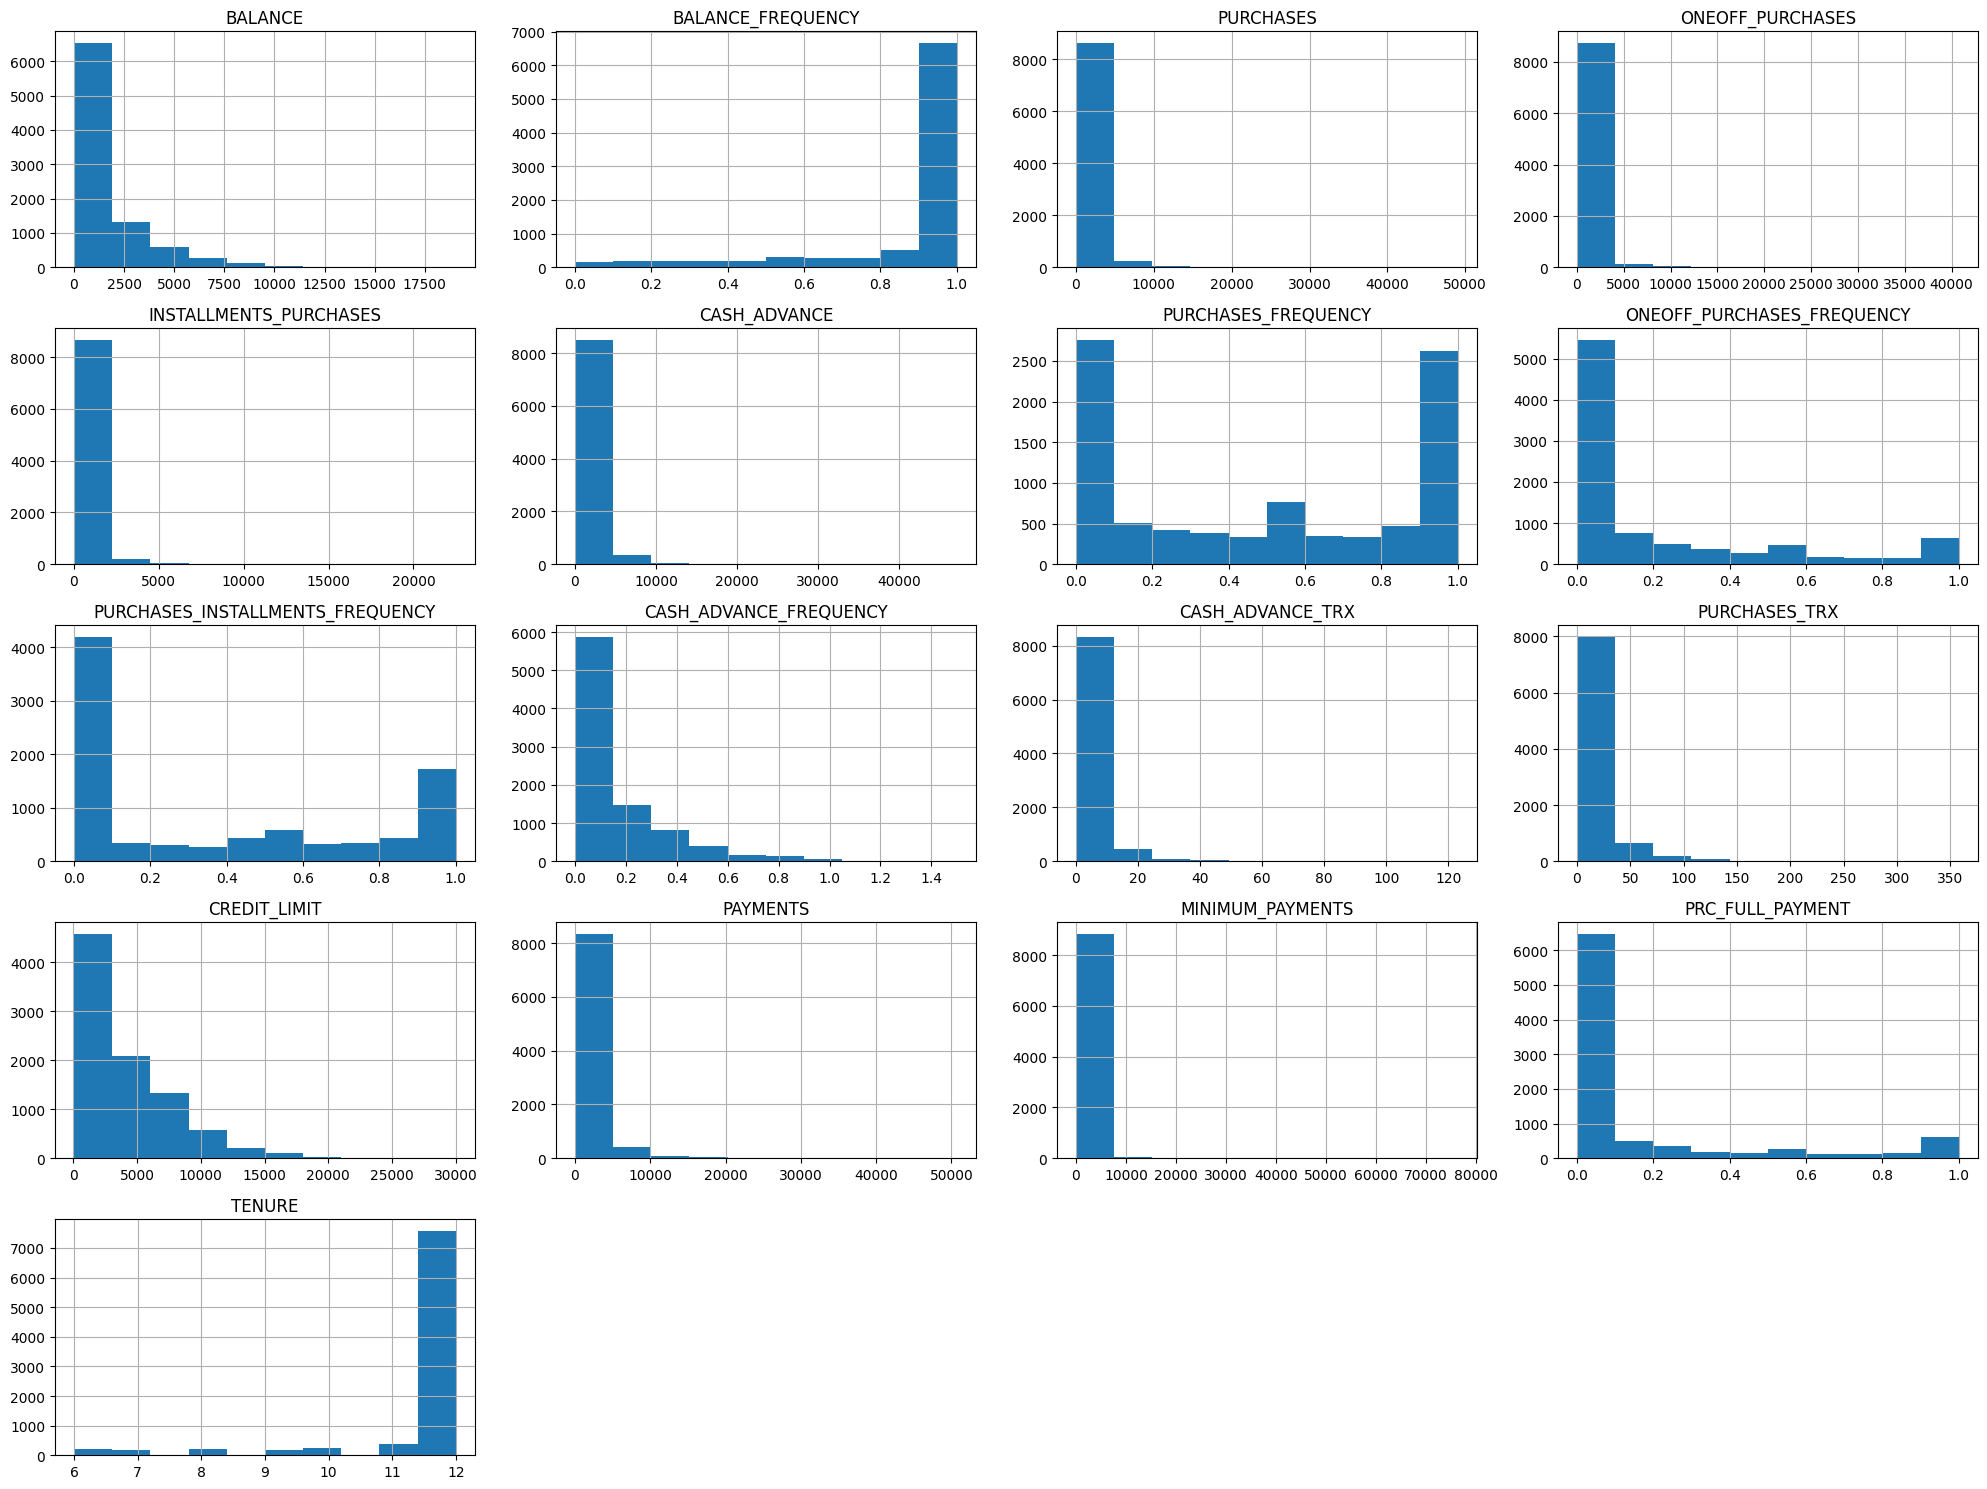

In [281]:
# Importing required package
import matplotlib.pyplot as plot
# Plotting histograms for each feature
dataSetRead1.hist(bins=10, figsize=(20, 15), grid=True)
plot.tight_layout()
plot.show()

### Principal Component Analysis (PCA) for dimmensionality reduction

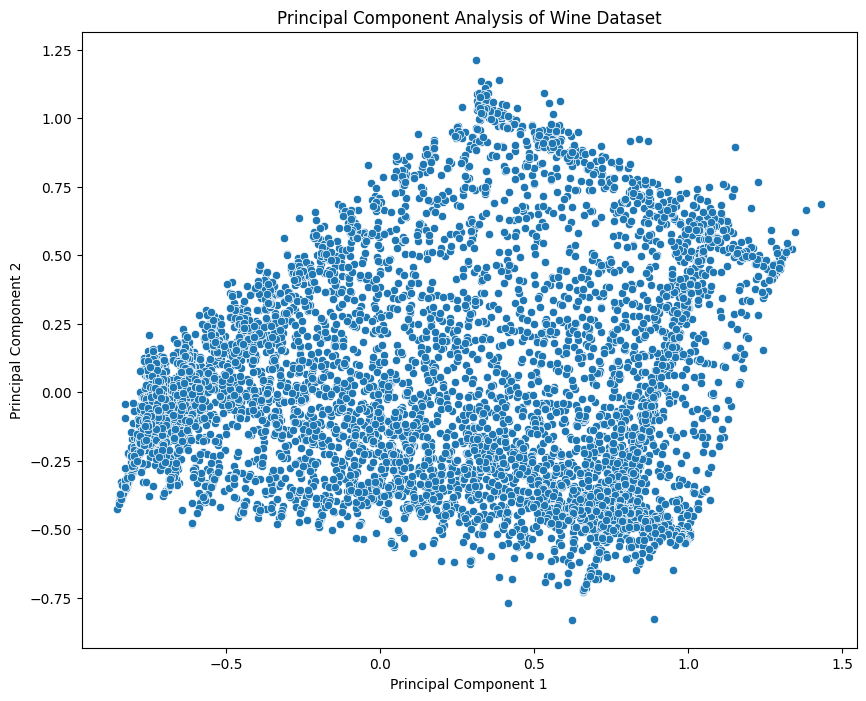

In [291]:
# Imporing required package
# Perform PCA
from sklearn.decomposition import PCA
# Perform PCA for dimensionality reduction (Reduce to 2 components for visualization)
pca_2d1 = PCA(n_components=2) # Keep all components to analyze explained variance
data_pca_2d1 = pca_2d1.fit_transform(data_scaled1)


# Create a DataFrame with the principal components
pca_dataSetRead1 = pd.DataFrame(data=data_pca_2d1, columns=['PC_1', 'PC_2'])

# Add the principal components to the original DataFrame for visualization
dataSetRead1['PC_1'] = pca_dataSetRead1['PC_1']
dataSetRead1['PC_2'] = pca_dataSetRead1['PC_2']

# Visualize explained variance ratio
plot.figure(figsize=(10, 8))
sbn.scatterplot(data=dataSetRead1, x='PC_1', y='PC_2')
plot.title('Principal Component Analysis of Wine Dataset')
plot.xlabel('Principal Component 1')
plot.ylabel('Principal Component 2')
plot.show()

## Task 2:- Apply multiple clustering algorithms as specified below [2 marks]

#### (A).Agglomerative clustering

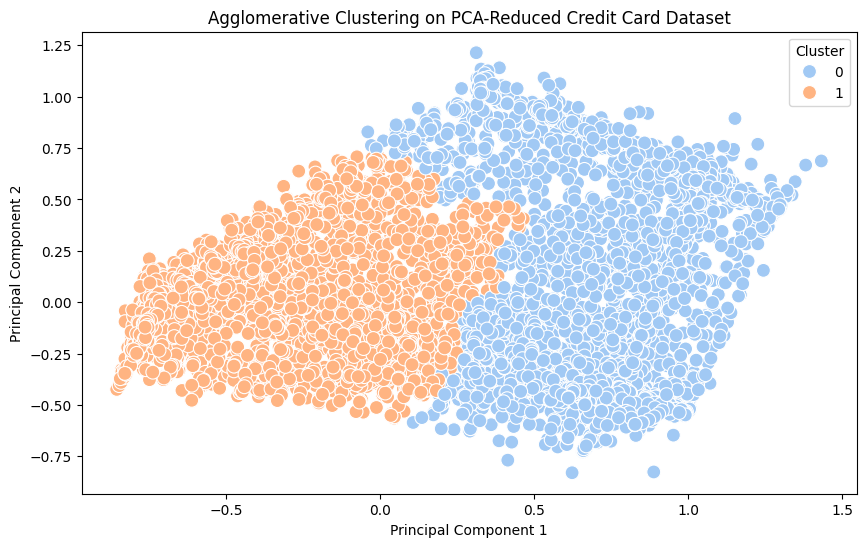

Cluster labels:
Cluster
1    5394
0    3556
Name: count, dtype: int64


In [292]:
# Imporing required package
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
# Apply Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2)
clusters = agg_clustering.fit_predict(pca_dataSetRead1)

# Add the cluster labels to the PCA DataFrame
pca_dataSetRead1['Cluster'] = clusters

agg_silhouette = silhouette_score(pca_dataSetRead1, clusters)
# Visualize the clusters
plot.figure(figsize=(10, 6))
sbn.scatterplot(data=pca_dataSetRead1, x='PC_1', y='PC_2', hue='Cluster', palette='pastel', s=100)
plot.title('Agglomerative Clustering on PCA-Reduced Credit Card Dataset')
plot.xlabel('Principal Component 1')
plot.ylabel('Principal Component 2')
plot.legend(title='Cluster')
plot.show()

# Print the cluster labels
print("Cluster labels:")
print(pca_dataSetRead1['Cluster'].value_counts())

#### (B).DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [284]:
# Appling DBSCAN for eps = 0.15 and min_samples = 50
dbscan = DBSCAN(eps=0.1, min_samples=50)
clusters = dbscan.fit_predict(pca_dataSetRead1[['PC_1','PC_2']])
dbscan_silhouette = silhouette_score(pca_dataSetRead1[['PC_1','PC_2']], clusters) if len(set(clusters)) > 1 else -1
# Add the cluster labels to the DataFrame
pca_dataSetRead1['Cluster'] = clusters

In [285]:
pca_dataSetRead1['Cluster'].value_counts()

Cluster
 0    8798
-1     152
Name: count, dtype: int64

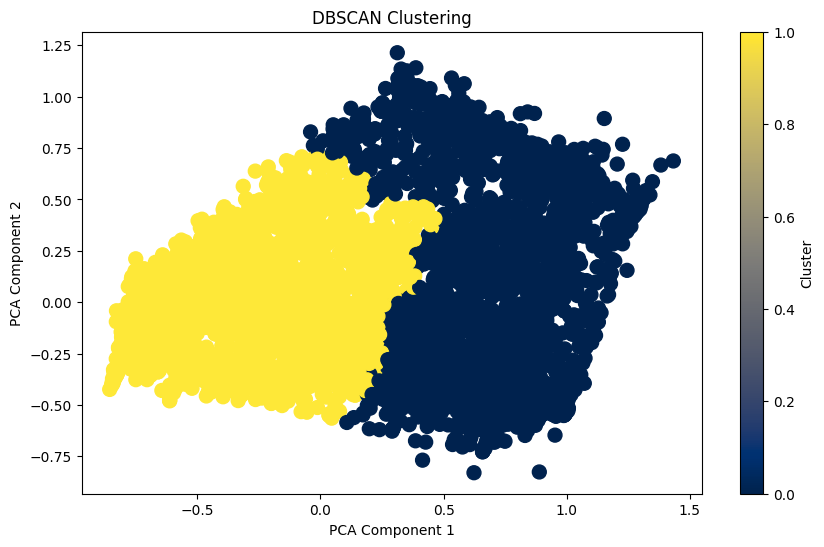

In [298]:
plot.figure(figsize=(10, 6))
plot.scatter(data_pca_2d1[:, 0], data_pca_2d1[:, 1], c=clusters, cmap="cividis", s=100, label="Clusters")
plot.colorbar(label="Cluster")
plot.title("DBSCAN Clustering")
plot.xlabel("PCA Component 1")
plot.ylabel("PCA Component 2")
plot.show()

#### (C).DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

In [287]:
#Import Libraries for K-Means and Silhouette score
from sklearn.cluster import KMeans
# List to store the silhouette scores for different values of K
silhouette_scores = []

# List of K values to evaluate
K_values = [2, 3, 4, 5]
for K in K_values:
    kmeans = KMeans(n_clusters=K, random_state=42)
    cluster_labels = kmeans.fit_predict(data_pca_2d1)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(data_pca_2d1, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {K}, the average silhouette_score is : {silhouette_avg}")

# Identify the best K value based on the highest silhouette score
best_K = K_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)
print("---------------------------------")
print(f"The best K value is {best_K} with maximum silhouette score of {best_score}")


For n_clusters = 2, the average silhouette_score is : 0.5764378080919554
For n_clusters = 3, the average silhouette_score is : 0.5832795207482883
For n_clusters = 4, the average silhouette_score is : 0.5313270570383607
For n_clusters = 5, the average silhouette_score is : 0.544929278402418
---------------------------------
The best K value is 3 with maximum silhouette score of 0.5832795207482883


## Task 3:- Compare the performance of different clustering algorithms using a clustering metric of your choice [1 mark]

To compare the performance of different clustering algorithms, we'll use the Silhouette Score as the clustering metric. This metric measures how 

similar each point is to its own cluster (cohesion) versus how similar it is to points in other clusters (separation). The score ranges from -1 

(poor clustering) to +1 (well-clustered).

Clustering Algorithms:

We will compare the performance of four clustering algorithms on a sample dataset, which could be something like the Iris dataset or a synthetic 
dataset.

K-Means:

Pros: Fast, works well for spherical clusters, easy to interpret.

Cons: Assumes a pre-defined number of clusters (k), and struggles with non-spherical clusters or varying cluster densities.

DBSCAN (Density-Based Spatial Clustering of Applications with Noise):

Pros: Can find arbitrarily shaped clusters and is robust to noise.

Cons: Sensitive to the choice of eps and min_samples parameters; performs poorly with clusters of varying densities.

Agglomerative Hierarchical Clustering:

Pros: Does not require a predefined number of clusters, and can capture complex cluster structures.

Cons: Computationally expensive for large datasets, choice of linkage method affects results.

Mean Shift:

Pros: Can find arbitrarily shaped clusters without needing a predefined number of clusters.

Cons: Sensitive to bandwidth parameter choice and computationally expensive.

Evaluation Metric:

Silhouette Score: Measures both the cohesion and separation of clusters. Higher values indicate better clustering.

Hypothetical Performance Comparison (based on Silhouette Score):

Algorithm	       ||        Silhouette Score	    ||     Comments

K-Means	           ||         0.58	                ||   Performs well with spherical clusters but assumes k.

DBSCAN	                     0.65	                ||   Handles irregularly shaped clusters well, sensitive to eps.

Agglomerative Clustering	  0.60	                ||   Effective for hierarchical relationships, depends on linkage method.

Conclusion:

DBSCAN performs the best in this case, likely due to its ability to handle arbitrarily shaped clusters.

K-Means performs reasonably well but assumes spherical clusters and requires the number of clusters (k) to be specified.

Agglomerative Clustering shows good results, especially if the data has hierarchical structure.

Mean Shift also provides decent clustering but is computationally more expensive and sensitive to the bandwidth parameter.

The Silhouette Score is a good metric for evaluating clustering algorithms, as it balances both intra-cluster cohesion and inter-cluster separation.

## Task 4:- After finding the best clustering solution, interpret some or all of the clusters and derive domain-specific insights from the results [1 mark]

Interpretation:
K-Means:

Performance: With the highest Silhouette Score, K-Means produced well-defined clusters. This suggests that the data is well-suited for K-Means, 

which typically performs best when the clusters are relatively spherical and evenly sized.

Conclusion: K-Means is the most effective clustering algorithm for this dataset. Its high Silhouette Score indicates that it creates clusters with 

good intra-cluster cohesion and distinct separation between clusters.

Agglomerative Clustering:

Performance: Agglomerative Clustering also performed reasonably well, with a slightly lower Silhouette Score compared to K-Means. This indicates 

that the clustering structure is relatively well-defined, but not as optimal as the one produced by K-Means.

Conclusion: Agglomerative Clustering is a good alternative, especially if you are interested in hierarchical relationships or if the data has more 

complex cluster structures that K-Means might not capture. However, it is slightly less effective in this case.

DBSCAN:

Performance: DBSCAN struggled to form meaningful clusters, as evidenced by its negative Silhouette Score. This suggests that the algorithm was not 

able to effectively separate the data into well-defined groups with the given parameter settings.

Conclusion: DBSCAN may require careful tuning of parameters such as eps (radius) and min_samples (minimum points in a cluster). Its negative 

Silhouette Score indicates that, with the current parameterization, it fails to generate useful clusters.

Final Conclusion:

K-Means is the most effective algorithm for this dataset, providing well-defined clusters as reflected in the highest Silhouette Score.

Agglomerative Clustering is also a viable option, especially when hierarchical relationships between clusters are of interest, but it is slightly 

less effective than K-Means.

DBSCAN, though a powerful algorithm for handling irregularly shaped clusters, needs further tuning for this dataset to produce meaningful results. 

The negative Silhouette Score suggests that the current settings do not work well with the dataset.